In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Probabilistic Approaches in Natural Language  Processing

## Overview

### Methods

* N-gram Language Model
* Bag of Words
* TF-IDF
* Latent Dirichlet Allocation
* Variational Bayesian methods
* Kullback-Leibler divergence

### Problems

* The simpliest NER
* Topic Retrieval

# 🎓 Method: N-gram Language Model

An n-gram is a contiguous sequence of n items from a given sample of text or speech.

N-grams captures the context in which the words are used together. For example, it might be a good idea to consider bigrams like "New York" instead of breaking it into individual words like "New" and "York". In this case our model is able to consider a separate token for the city instead of thinking that "York" can be old.

In [2]:
corpus = [
          'I have never been to New York'
]

In [3]:
from nltk import ngrams

# Uni-gram
print(corpus[0].split())

# Bi-gram
bi_gram = list(ngrams(corpus[0].split(), 2))
print([' '.join(g) for g in bi_gram])

# Tri-gram
tri_gram = list(ngrams(corpus[0].split(), 3))
print([' '.join(g) for g in tri_gram])

['I', 'have', 'never', 'been', 'to', 'New', 'York']
['I have', 'have never', 'never been', 'been to', 'to New', 'New York']
['I have never', 'have never been', 'never been to', 'been to New', 'to New York']


# 🎓 Method: Bag of Words

Bag of words is a vector space model which is used in NLP. The method provides one of the simplest ways to vectorize a text.

In [5]:
corpus = [
    'john cena has never been to new york and to the united arab emirates',
    'new york looks awesome said john cena',
    'john cena did not travel to the united arab emirates but he visited new york last summer',
    'john cena wants to travel to arab emirates',
    'united arab emirates is a rich country',
    'new york is a city in the us',
    'new york was never located in arab emirates'
]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of words vectorization
bow_vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english')
X = bow_vectorizer.fit_transform(corpus)

print(bow_vectorizer.get_feature_names_out()[:10])
print(X.toarray()[:, :10])

['arab emirates' 'arab emirates rich' 'arab emirates visited'
 'awesome said' 'awesome said john' 'cena did' 'cena did travel'
 'cena new' 'cena new york' 'cena wants']
[[1 0 0 0 0 0 0 1 1 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


# ⚠️ Problem: NER

Problem: identify the named entities in the uncased text corpus.

In [7]:
def merge_ngrams(ngrams):
  """ Get the longest n-gram token. """
  merged_ngrams = list()
  for i in range(len(ngrams)):
    skip = False
    for j in range(len(ngrams)):
      if i != j and ngrams[i] in ngrams[j]:
        skip = True
        break
    if not skip:
      merged_ngrams.append(ngrams[i])
  return merged_ngrams

In [8]:
# Keep only 5 features with the highest probability of occurence
bow_vectorizer = CountVectorizer(ngram_range=(2,3), max_features=5)
X = bow_vectorizer.fit_transform(corpus)

res = bow_vectorizer.get_feature_names_out()[:10]
merged_res = merge_ngrams(res)

merged_res

['john cena', 'new york', 'united arab emirates']

# 🎓 Method: TF-IDF

TF-IDF stands for "Term Frequency — Inverse Document Frequency". This is a technique to quantify words in a set of documents. The idea is the following: we compute a score for each token to signify its importance in the document and corpus:

$$tf\_idf(t,d) = tf(t,d) \times idf(t)$$

**Term frequency**, tf(t,d), is the frequency of term t, where $f_{t,d}$ is the raw count of a term in a document, i.e., the number of times that term t occurs in document d:

$$tf(t,d)=\frac{f_{t,d}}{\sum_{t' \in d}f_{t',d}}$$

The **inverse document** frequency is a measure of how much information the word provides, i.e., if it is common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(t,D)=log \frac{N}{|\{ d \in D: t \in d\}|}$$

Another option of specifying IDF is **probabilistic inverse document frequency**:

$$idf(t,D)=log \frac{N-n_t}{n_t}$$

Where $N$ is the total number of documents in the corpus: $N=|D|$ and $n_t=\{ d \in D: t \in d\}|$, number of documents where the term $t$ appears.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,3), stop_words='english')
X = tfidf_vectorizer.fit_transform(corpus)

print(tfidf_vectorizer.get_feature_names_out()[:10])
print(X.toarray()[:, :10])

['arab emirates' 'arab emirates rich' 'arab emirates visited'
 'awesome said' 'awesome said john' 'cena did' 'cena did travel'
 'cena new' 'cena new york' 'cena wants']
[[0.19115712 0.         0.         0.         0.         0.
  0.         0.35424672 0.35424672 0.        ]
 [0.         0.         0.         0.32156726 0.32156726 0.
  0.         0.         0.         0.        ]
 [0.13503602 0.         0.25024477 0.         0.         0.25024477
  0.25024477 0.         0.         0.        ]
 [0.19483551 0.         0.         0.         0.         0.
  0.         0.         0.         0.36106342]
 [0.23443723 0.43445215 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.22838907 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


# 🎓 Method: Latent Dirichlet Allocation

Latent Dirichlet Allocation is a generative probabilistic model for collections of discrete dataset such as text corpus. It is also a topic model that is used for discovering abstract (latent) topics from a collection of documents. LDA will discover sets of terms (topics) based on the co-occurrence of individual terms, though the task of assigning a meaningful label to an individual topic is up to the user.

The LDA model includes 2 steps:
1. Generative process
2. Inference

### Generative process

Documents are represented as random mixtures over latent topics, where each topic is characterized by a distribution over all the words. LDA assumes the following generative process for a corpus $D$ consisting of $M$ documents each of length $N_{i}$:

1. Choose $\theta \sim Dir(\alpha)$, where $i \in \{1,...,M \}$ and $Dir(\alpha)$ is a Dirichlet distribution with a symmetric parameter $\alpha$ (which typically is: $\alpha$ < 1)
2. Choose $\varphi_k \sim Dir(β)$, where $k \in \{1,\dots ,K\}$ and $\beta$  typically less than 1.
3. For each of the word positions $i,j$, where $i\in \{1,\dots ,M\}$ and $j\in \{1,\dots ,N_{i}\}$.
    
    (a) Choose a **topic** $z_{i,j} ∼ Multinomial(\theta _{i})$

    (b) Choose a **word** $w_{i,j}\sim Multinomial (\varphi_{z_{i,j}})$ 

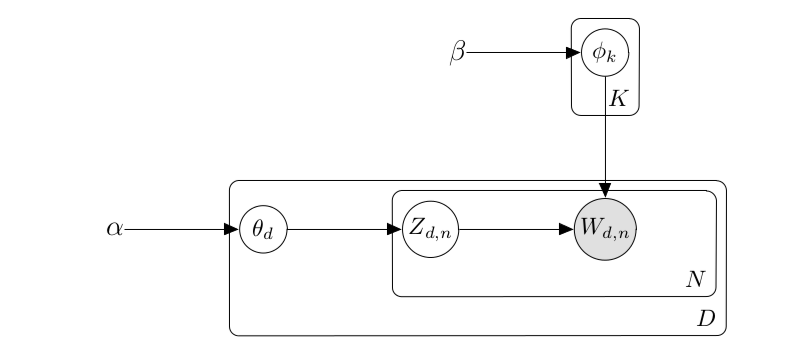

❔ BTW, what means "latent" in LDA?

In statistics, **latent variables** are variables that are not directly observed but are rather inferred from other variables that are observed. Mathematical models that aim to explain observed variables in terms of latent variables are called latent variable models.

### Inference

There are several approaches of statistical inference regarding LDA:
* Monte Carlo simulation
* Variational Bayes
* Likelihood maximization
* Unknown number of populations/topics

We'll consider the model inference based on the variational Bayes, because it's the most popular in ML application of LDA and it's already implemented in Scikit Learn.

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

# Let's assume there're 5 abstract topics in our dataset
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_res = lda.fit_transform(X)
lda_res

array([[0.04757319, 0.04753165, 0.80941903, 0.04746326, 0.04801287],
       [0.04696901, 0.0469828 , 0.81204953, 0.0470381 , 0.04696056],
       [0.84714182, 0.0380768 , 0.03835814, 0.03809413, 0.03832911],
       [0.05082601, 0.05079596, 0.05103157, 0.05075629, 0.79659016],
       [0.05597131, 0.05584366, 0.05607246, 0.05578073, 0.77633184],
       [0.07479979, 0.07493936, 0.07506225, 0.70048473, 0.07471387],
       [0.05611795, 0.77494675, 0.05630561, 0.05632218, 0.05630752]])

In [11]:
lda_res.argmax(axis=1)

array([2, 2, 0, 4, 4, 3, 1])

# 🎓 Method: Variational Bayes

Variational Bayesian methods are a family of techniques for approximating intractable integrals arising in Bayesian inference and machine learning. 

In the LDA model it's applied to get the analytical approximation of the posterior distribution. In other words, it's used to perform the statistical inference and get the posterior probability over the unnkown parameters and latent variables.

In variational inference, the posterior distribution over a set of unobserved variables $\textbf{Z}=\{Z_1,...,Z_n\}$ given some data X is approximated by a so-called variational distribution, Q(**Z**):

$$P(\textbf{Z}|\textbf{X}) \approx Q(\textbf{Z}) $$

The distribution Q(**Z**) is restricted to belong to a family of distributions of simpler form (e.g. a family of Gaussian distributions) than P(**Z**|**X**), selected with the intention of making Q(**Z**) similar to the true posterior, P(**Z**|**X**).

The similarity (or dissimilarity) is measured in terms of a dissimilarity function $d(Q;P)$ and hence inference is performed by selecting the distribution Q(**z**) that minimizes $d(Q;P)$.

Variational techniques are typically used to form an approximation for:

$$P(\textbf{Z}|\textbf{X}) = \frac{P(\textbf{X}|\textbf{Z})P(\textbf{Z})}{P(\textbf{X})}=\frac{P(\textbf{X}|\textbf{Z}) P(\textbf{Z})}{∫_{\textbf{Z}}P(\textbf{X},\textbf{Z}') d\textbf{Z}'}$$

The marginalization over **Z** to calculate P(**X**) in the denominator is typically intractable, because, for example, the search space of **Z** is combinatorially large. Therefore, we seek an approximation, using $ Q(\textbf{Z}) \approx P(\textbf{Z}|\textbf{X}) $. The most common type of variational Bayes uses the **Kullback–Leibler divergence** (KL-divergence) of Q from P as the choice of dissimilarity function. This choice makes this minimization tractable.

Algorithm for computing the parameters is quite complex, so we'll skipt it. You can find more info about it [here](https://en.wikipedia.org/wiki/Variational_Bayesian_methods#Algorithm_for_computing_the_parameters).

# 🎓 Method: Kullback-Leibler divergence

The Kullback–Leibler divergence $D_{KL}(Q||P)$ in case of LDA:

$$D_{KL}(Q||P)=\sum_{Z}Q(\textbf{Z}) log \frac{Q(\textbf{Z})}{P(\textbf{Z}|\textbf{X})}$$

In the LDA method Q and P are reversed. This use of reversed KL-divergence is conceptually similar to the **expectation-maximization algorithm** and using the KL-divergence in the other way produces the **expectation propagation algorithm**. It's out of scope of the current topic, but you can read about it here:
* [Expectation–maximization (EM) algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)
* [Expectation propagation](https://en.wikipedia.org/wiki/Expectation_propagation)

The original KL-divergence is defined as:

$$D_{KL}(P||Q)=\sum_{Z}P(\textbf{Z}) log \frac{P(\textbf{Z})}{Q(\textbf{Z}|\textbf{X})}$$

Considering two probability distributions **P** and **Q**. Usually, **P** represents the data, the observations, or a measured probability distribution. Distribution **Q** represents instead a theory, a model, a description or an approximation of **P**. The Kullback–Leibler divergence is then interpreted as the average difference of the number of bits required for encoding samples of **P** using a code optimized for **Q** rather than one optimized for **P**.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

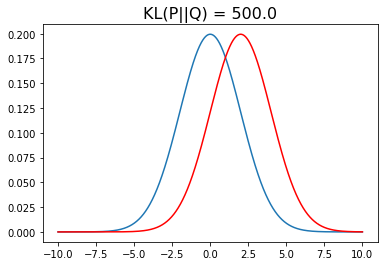

In [13]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

plt.title(f'KL(P||Q) = {kl_divergence(p, q).round(2)}', fontsize=16)
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show()

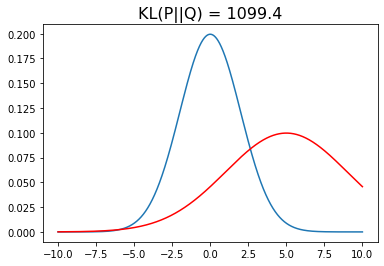

In [14]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 5, 4)

plt.title(f'KL(P||Q) = {kl_divergence(p, q).round(2)}', fontsize=16)
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show()

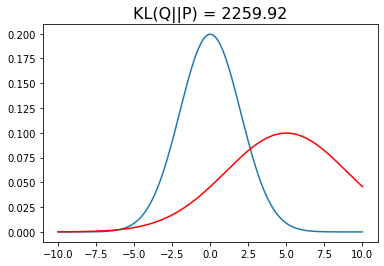

In [15]:
"""
It's important to note that the KL divergence is not symmetrical. 
In other words, if we switch P for Q and vice versa, we get a different result.
"""

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 5, 4)

plt.title(f'KL(Q||P) = {kl_divergence(q, p).round(2)}', fontsize=16)
plt.plot(x, p)
plt.plot(x, q, c='red')
plt.show()

# ⚠️ Problem: Topic Retrieveal

In [16]:
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), stop_words='english')

lda = LatentDirichletAllocation(n_components=4, random_state=42)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(corpus)

def print_top_words(model, feature_names, n_top_words):
  for idx, topic in enumerate(model.components_):
    features = ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    message = f"Topic {idx+1}: " + features
    print(message)

feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, feature_names, 3)

Topic 1: cena, john, john cena
Topic 2: emirates, arab emirates, arab
Topic 3: new, york, new york
Topic 4: city, new york city, york city
